In [1]:
num=int(input("enter number:"))
if num%2==0:
     if num%3==0:
          if num%5==0:
               print ("Divisible by 2, 3 and 5")
          else:
               print ("divisible by 2 not divisible by 3")
else:
     if num%3==0:
         print ("divisible by 3 not divisible by 2")
     else:
          if num%5==0:
               print ("divisible by 5 not divisible by 2 and 3")
          else:
               print ("not Divisible by 2, 3 and 5")



enter number:49
not Divisible by 2, 3 and 5


In [2]:
score=eval(input('Enter your score: '))
if score <45:
     print('failed')
else:
     print('passed')

score=eval(input('Enter your score: '))
if score <45:
     print('f')
elif score < 50:
     print('D')
elif score < 60:
     print('C')
elif score < 70:
     print('D')
else:
     print('A')

Enter your score: 40
failed
Enter your score: 77
A


(-1.1035355458567466,
 1.1742462455331668,
 -1.179816705732046,
 1.2205160474117125)

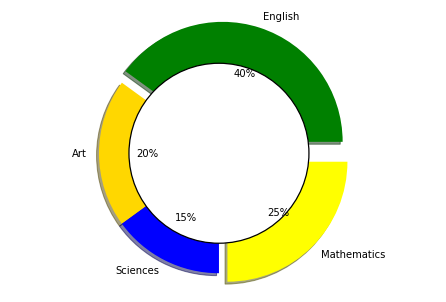

In [3]:
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
Aggregatescore = [40,20,15,25]
Subjects = ['English', 'Art', 'Sciences', 'Mathematics']
colors = ['green', 'gold', 'blue', 'yellow']
explode = (0.1, 0, 0, 0.1) 
plt.pie(Aggregatescore, labels=Subjects, colors=colors,explode=explode, autopct='%1.0f%%',shadow=True) 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)
plt.axis('equal')

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
N = 60
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = 1 + 2*x1 + 3*x2 + 4*x1*x2
data = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.270e+31
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:30:49   Log-Likelihood:                 1923.4
No. Observations:                  60   AIC:                            -3839.
Df Residuals:                      56   BIC:                            -3831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   3.97e-16   2.52e+15      0.0

In [5]:
#estimated coefficients 
print(result.params)

Intercept    1.0
x1           2.0
x2           3.0
x1:x2        4.0
dtype: float64


In [6]:
print(result.rsquared)

1.0


In [7]:
print(result.fvalue)

4.270032774764798e+31


In [8]:
print(result.f_test)

<bound method LikelihoodModelResults.f_test of <statsmodels.regression.linear_model.OLSResults object at 0x000000CC464FFEF0>>


In [9]:
R = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print(result.f_test(R))

<F test: F=array([[4.27003277e+31]]), p=0.0, df_denom=56, df_num=3>


In [10]:
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(result.resid)
print(JB,JBpv,skw,kurt)

36.00216570812765 1.5213496825162932e-08 -1.2676860244541106 5.823606710727609


In [11]:
z, p = stats.normaltest(result.fittedvalues.values)
p

3.3646869132613084e-09

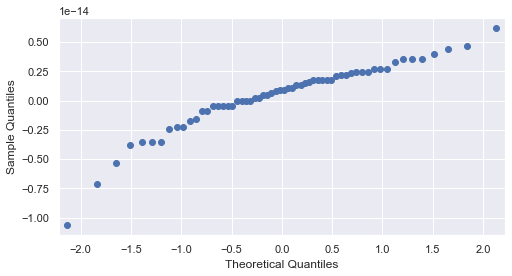

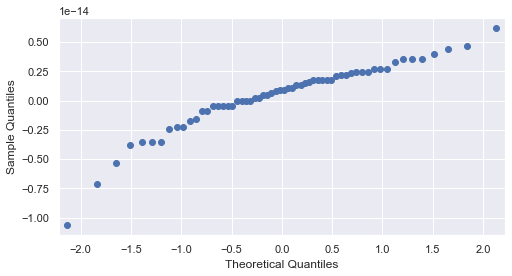

In [12]:
#qqpolot vs. normal distribution
fig,ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [13]:
infl = result.get_influence()
#leverage
a=infl.hat_matrix_diag
a

array([0.03939065, 0.03992673, 0.0375551 , 0.11419651, 0.02146147,
       0.03442366, 0.04541401, 0.05579963, 0.12130947, 0.04465704,
       0.06623714, 0.05883133, 0.01749624, 0.04091549, 0.03479426,
       0.20105428, 0.03194294, 0.02492628, 0.09157681, 0.017997  ,
       0.04434373, 0.02666462, 0.04534827, 0.02964978, 0.12673061,
       0.15265977, 0.05985392, 0.10618227, 0.07177897, 0.12261858,
       0.04762016, 0.03428163, 0.32139216, 0.13090497, 0.02344937,
       0.10158224, 0.09733804, 0.0363192 , 0.03050634, 0.10980881,
       0.03369846, 0.0335521 , 0.01852477, 0.03797674, 0.09717761,
       0.01911269, 0.0506714 , 0.18039756, 0.07776319, 0.01949231,
       0.02440217, 0.02985767, 0.04442012, 0.11862985, 0.0172769 ,
       0.02391418, 0.01830261, 0.06450272, 0.12155156, 0.10983589])

In [14]:
#internally studentized residuals
b=infl.resid_studentized_internal
b

array([ 1.21042   , -0.30268947, -0.3023163 , -1.33927493,  0.        ,
       -0.60365137,  0.1517791 , -0.15261156, -1.26558559,  0.83445428,
        0.30692425,  0.15285716,  0.37401792, -1.21138184, -0.52829634,
        1.49314981, -0.75359678,  0.75088043,  0.9335265 ,  0.28058495,
        1.13770565,  0.45093039, -0.83475632,  0.07527058,  0.6347539 ,
       -2.57757065,  1.52940265,  0.        , -0.15391956,  1.26652941,
        0.60781918,  0.52815611, -4.32037371, -1.27255295,  0.71279679,
       -1.87742065,  0.93650088,  0.45318357,  0.75303823,  2.2004216 ,
       -0.1508562 ,  0.60337912, -0.14968554,  0.831552  ,  1.63873092,
       -0.14973039,  0.6087952 ,  0.98280903,  0.61767251,  0.50543788,
        0.78821265,  0.82806508,  1.2136012 ,  0.        ,  0.22438571,
        0.37524552,  0.0748343 ,  0.        , -0.79109998,  0.31435072])

In [15]:
#values provided by the property of the object
c=infl.resid_studentized_external
c

array([ 1.09803693, -0.44055516, -0.43327243, -0.92642416,  0.        ,
       -0.50201527,  0.19684019, -0.13352585, -2.24154562,  0.92707425,
        1.16710309,  0.29980491,  0.76064696, -1.48646262, -0.89189147,
        1.156384  , -1.03454663,  0.44491725,  0.709491  ,  0.33201736,
        1.2724117 ,  1.32547183, -0.61865338,  0.07524653,  0.09383195,
       -3.90150861,  1.89344505,  0.        , -0.17720978,  0.7488463 ,
        0.47729358,  0.32206138, -5.15586544, -2.89137762,  1.10169331,
       -2.14542943,  0.99868756,  0.40478839,  1.44922733,  4.28865157,
       -0.13788615,  1.13942737, -0.23257259,  0.8277487 ,  2.576954  ,
       -0.14092405,  1.1821816 ,  1.24284491,  0.48674122,  1.41883722,
        0.6450516 ,  0.83620908,  1.45000281,  0.        ,  0.2818408 ,
        0.36067886,  0.08468426,  0.        , -0.84778569,  0.29400116])

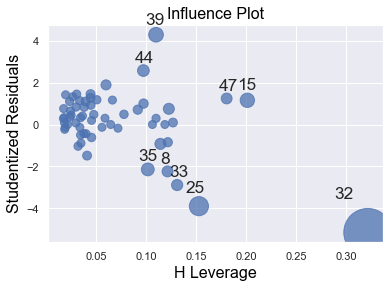

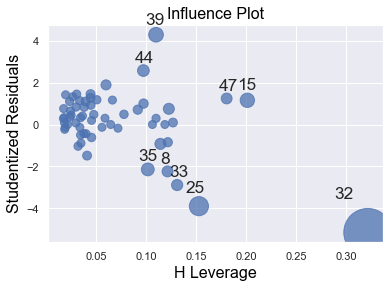

In [16]:
#graphical representation of the influences()
sm.graphics.influence_plot(result)

In [17]:
#Other criteria for detecting influential points
print(infl.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))

    hat_diag  student_resid    dffits   cooks_d
0   0.039391       1.098037  0.222352  0.015020
1   0.039927      -0.440555 -0.089842  0.000953
2   0.037555      -0.433272 -0.085587  0.000892
3   0.114197      -0.926424 -0.332635  0.057809
4   0.021461       0.000000  0.000000  0.000000
5   0.034424      -0.502015 -0.094788  0.003248
6   0.045414       0.196840  0.042934  0.000274
7   0.055800      -0.133526 -0.032460  0.000344
8   0.121309      -2.241546 -0.832869  0.055282
9   0.044657       0.927074  0.200438  0.008137
10  0.066237       1.167103  0.310843  0.001671
11  0.058831       0.299805  0.074957  0.000365
12  0.017496       0.760647  0.101505  0.000623
13  0.040915      -1.486463 -0.307022  0.015651
14  0.034794      -0.891891 -0.169339  0.002515
15  0.201054       1.156384  0.580096  0.140263
16  0.031943      -1.034547 -0.187926  0.004685
17  0.024926       0.444917  0.071136  0.003603
18  0.091577       0.709491  0.225266  0.021963
19  0.017997       0.332017  0.044947  0

In [18]:
x=np.linspace(0, 1,5 )
X1, X2 = np.meshgrid(x, x)
data2 = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
y_pred = result.predict(data2)
y_pred

0      1.00
1      1.50
2      2.00
3      2.50
4      3.00
5      1.75
6      2.50
7      3.25
8      4.00
9      4.75
10     2.50
11     3.50
12     4.50
13     5.50
14     6.50
15     3.25
16     4.50
17     5.75
18     7.00
19     8.25
20     4.00
21     5.50
22     7.00
23     8.50
24    10.00
dtype: float64

In [19]:
x=np.linspace(0, 1,5 )
X1, X2 = np.meshgrid(x, x)
data2 = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
x1=data2['x1']
x2=data2['x2']
y=1 + 2*x1 + 3*x2 + 4*x1*x2
data2['y']= 1 + 2*x1 + 3*x2 + 4*x1*x2
data2

,x1,x2,y
0,0.00,0.00,1.00
1,0.25,0.00,1.50
2,0.50,0.00,2.00
3,0.75,0.00,2.50
4,1.00,0.00,3.00
5,0.00,0.25,1.75
6,0.25,0.25,2.50
7,0.50,0.25,3.25
8,0.75,0.25,4.00
9,1.00,0.25,4.75


In [20]:
data2_exog = sm.add_constant(data2)
data2_exog.head(5)

,const,x1,x2,y
0,1.0,0.00,0.0,1.0
1,1.0,0.25,0.0,1.5
2,1.0,0.50,0.0,2.0
3,1.0,0.75,0.0,2.5
4,1.0,1.00,0.0,3.0


In [21]:
pred_y = model.predict(result.params,data2_exog)
print(pred_y)

[ 5.    7.5  10.   12.5  15.    8.75 12.25 15.75 19.25 22.75 12.5  17.
 21.5  26.   30.5  16.25 21.75 27.25 32.75 38.25 20.   26.5  33.   39.5
 46.  ]


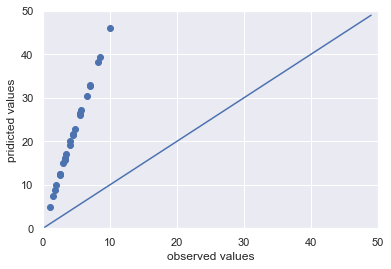

In [22]:
plt.scatter(data2['y'],pred_y)
plt.plot(np.arange(-5,50),np.arange(-5,50))
plt.xlabel('observed values')
plt.ylabel('pridicted values')
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
N = 60
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = 1 + 2*x1 + 3*x2 + 4*x1*x2
data = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
model = ols('y ~ x1 + x2 + x1*x2', data).fit()
anovaResults = anova_lm(model)
print(anovaResults)

            df        sum_sq       mean_sq             F  PR(>F)
x1         1.0  1.095942e+02  1.095942e+02  6.972778e+30     0.0
x2         1.0  1.293355e+03  1.293355e+03  8.228792e+31     0.0
x1:x2      1.0  8.114109e+02  8.114109e+02  5.162490e+31     0.0
Residual  56.0  8.801762e-28  1.571743e-29           NaN     NaN


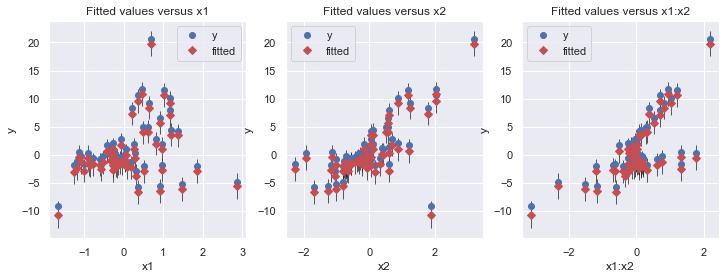

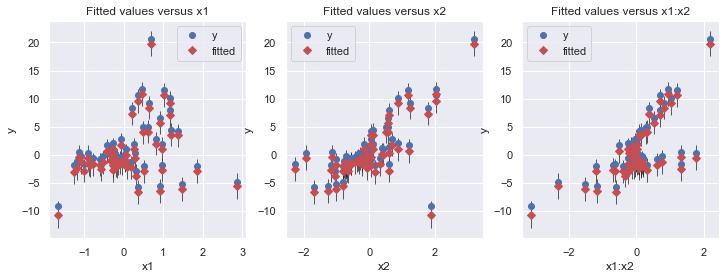

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
N = 60
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = 1 + 2*x1 + 3*x2 + 4*x1*x2
data = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
model = smf.ols("y ~ -1 + x1 + x2 + x1*x2", data)
result = model.fit()
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4))
smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)
smg.plot_fit(result, 2, ax=ax3)

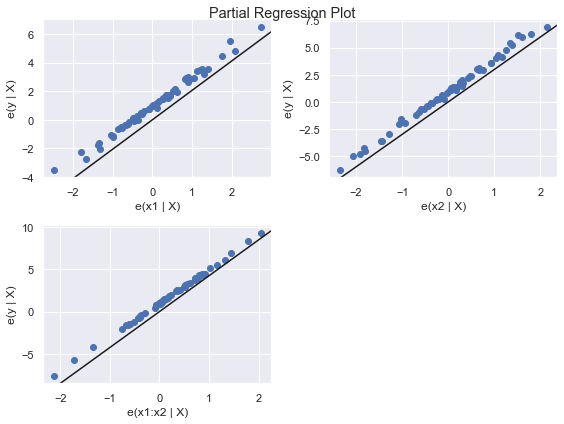

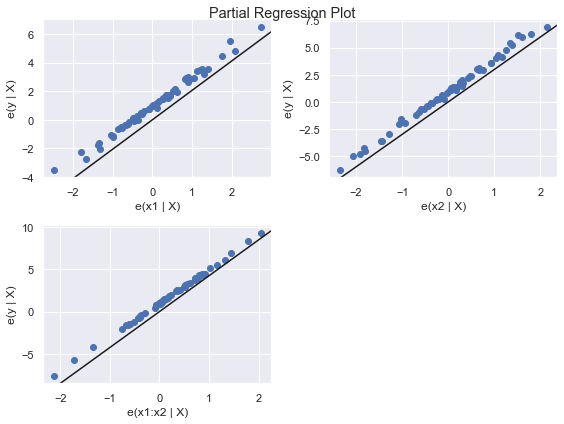

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.graphics.regressionplots import plot_partregress_grid
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
N = 60
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = 1 + 2*x1 + 3*x2 + 4*x1*x2
data = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
fig = plt.figure(figsize=(8, 6))
model = smf.ols("y ~ -1 + x1 + x2 + x1*x2", data)
result = model.fit()
plot_partregress_grid(result, fig=fig)

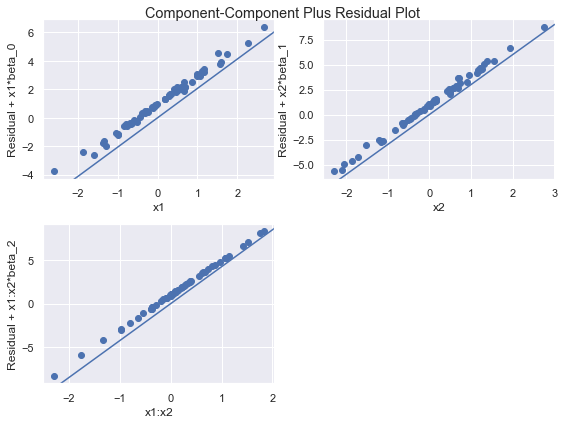

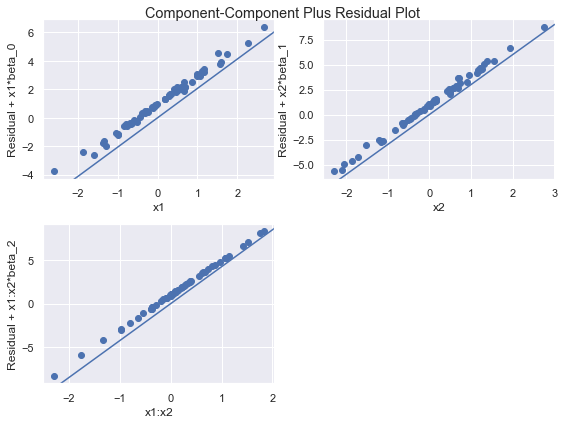

In [27]:
from statsmodels.graphics.regressionplots import plot_ccpr_grid
fig = plt.figure(figsize=(8, 6))
model = smf.ols("y ~ -1 + x1 + x2 + x1*x2", data)
result = model.fit()
plot_ccpr_grid(result, fig=fig)

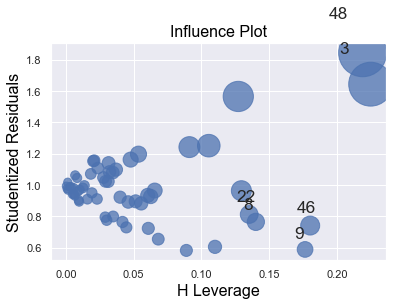

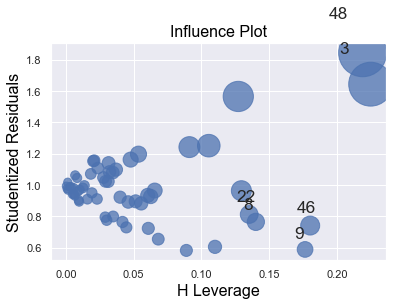

In [28]:
sm.graphics.influence_plot(result)

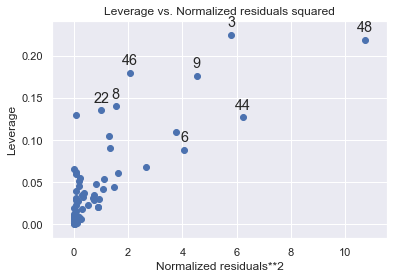

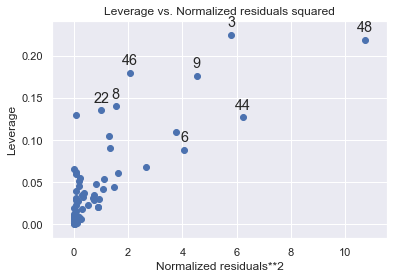

In [29]:
sm.graphics.plot_leverage_resid2(result)

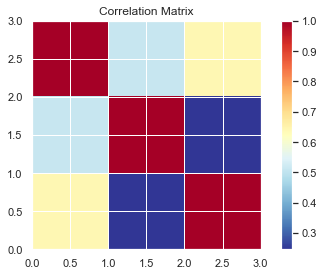

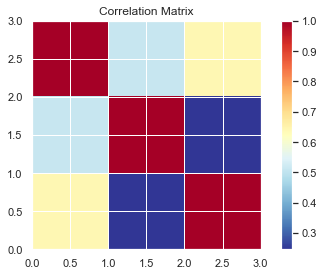

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.graphics.regressionplots import plot_partregress_grid
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
N = 60
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = 1 + 2*x1 + 3*x2 + 4*x1*x2
data = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
corr_matrix = np.corrcoef(data.T)
smg.plot_corr(corr_matrix)

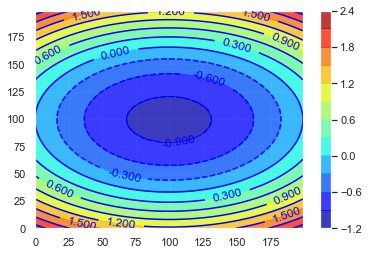

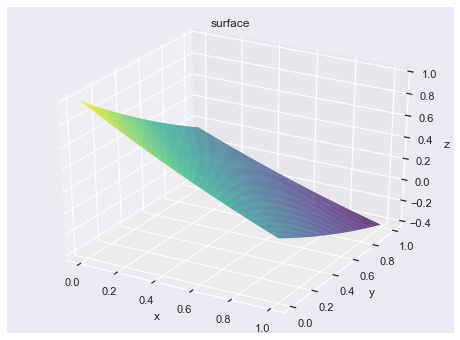

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 200
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x, y)
A = X*X/9 + Y*Y/4 - 1
cs = plt.contour(A,10, colors='blue')
csf = plt.contourf(A, 10, alpha=.75, cmap='jet')
plt.colorbar();
plt.clabel(cs)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), subplot_kw={'projection': '3d'})
a =np.linspace(0, 1, 100).reshape(10,10)
b =np.linspace(0, 1, 100).reshape(10,10)
A, B = np.meshgrid(a, b)
C = np.cos(np.sqrt(2*A + 2*B))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.plot_surface(A,B,C,rstride=1,cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');



In [32]:
a='School'
b='Unilorin'
Text ="my %s is %s" %(a,b)
Text
Text ="my {0} is {1}". format(a,b)
Text
Text= f"my {a} is {b}"
Text

'my School is Unilorin'